<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Обзор-исходных-данных" data-toc-modified-id="Обзор-исходных-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обзор исходных данных</a></span></li><li><span><a href="#Тренды-и-сезонность" data-toc-modified-id="Тренды-и-сезонность-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Тренды и сезонность</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Создание-признаков" data-toc-modified-id="Создание-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Создание признаков</a></span></li><li><span><a href="#Обучающая-и-тестовые-выборки" data-toc-modified-id="Обучающая-и-тестовые-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучающая и тестовые выборки</a></span></li><li><span><a href="#Модель-линейной-регрессии" data-toc-modified-id="Модель-линейной-регрессии-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель линейной регрессии</a></span></li><li><span><a href="#Модель-решающего-дерева" data-toc-modified-id="Модель-решающего-дерева-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Модель решающего дерева</a></span></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Модель случайного леса</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Тестирование-рассмотренных-моделей" data-toc-modified-id="Тестирование-рассмотренных-моделей-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Тестирование рассмотренных моделей</a></span></li><li><span><a href="#Результаты-с-точки-зрения-бизнеса" data-toc-modified-id="Результаты-с-точки-зрения-бизнеса-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Результаты с точки зрения бизнеса</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

#  Прогнозирование заказов такси на следующий час

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Построим модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Для выполнения поставленной задачи сделаем следующее:

1. Загрузим данные и выполним их ресемплирование по одному часу.
2. Проанализируем данные.
3. Сделаем тестовую выборку размером 10% от исходных данных. Обучим разные модели с различными гиперпараметрами. 
4. Проверим данные на тестовой выборке и сделаем выводы.


Данные лежат в файле `taxi.csv`. 

Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

Для начала **импортируем библиотеки**, которые будем использовать в ходе исследования:

In [1]:
# импорт библиотеки pandas
import pandas as pd

# импорт pyplot из библиотеки matplotlib
import matplotlib.pyplot as plt

# импорт библиотеки numpy
import numpy as np

# импорт библиотеки seaborn
import seaborn as sns

# из модуля tsa.seasonal библиотеки statsmodels импортируем seasonal_decompose()
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.model_selection import train_test_split

# импорт метрик из sklearn.metrics
from sklearn.metrics import mean_squared_error

# импортируем LogisticRegression  из модуля sklearn.linear_model
from sklearn.linear_model import LinearRegression

# импортируем DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# импортируем RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

Прочитаем файлы c данными из папки `/datasets`:

In [2]:
# чтение файла с данными и сохранение в data
data = pd.read_csv('/datasets/taxi.csv', 
                   index_col=[0],         # to use the column [0] as the index          
                   parse_dates=[0])       # to try parsing column [0] as a date column

Выведем общую информацию о таблице с помощью команды `info()`:

In [3]:
#вывод общей информации о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


*Из вывода общей информации о таблице видно*:
- Мы имеем около **26,5 тысяч** объектов временного ряда. 
- В таблице на данный момент *два признака*: столбец формата "дата и время", а также количество заказов - целевой признак.
- Отсутствуют пропущенные значения
- Формат даты и времени корректно считался, учитывается в таблице в качестве индекса (`DatetimeIndex`).

*Выведем первые несколько строк*:

In [4]:
# вывод первых 5 строк таблицы
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


Нам доступна информация о количестве заказов, сделанных каждые 10 минут.

Ознакомимся с характеристикой выборки количества заказов:

In [5]:
# характеристика выборки количества заказов за каждые 10 минут рассматриваемого периода
data.describe()

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


В среднем каждые 10 минут происходит около 14 заказов, медиана - 13. Эти показатели близки, что говорит о равномерности распределения, но достаточно большое стандартное отклонение, значит есть минуты пика и "простоя".

Для подстраховки сделаем сортировку по возрастанию времени:

In [6]:
# ссоритровка по возрастанию значений временного ряда
data.sort_index(inplace=True)

Выведем минимальное значение времени:

In [7]:
data.index.min()

Timestamp('2018-03-01 00:00:00')

Среднее:

In [8]:
data.index.mean()

Timestamp('2018-05-31 23:55:00')

И максимальное:

In [9]:
data.index.max()

Timestamp('2018-08-31 23:50:00')

В нашем распоряжении данные за период с **01 марта 2018 года** по **31 августа 2018 года**.

В дальнейшем нам предстоит многократно вызывать функцию построения графика, поэтому сделаем её вызов более удобным и компактным:

In [10]:
def plot_taxi(data,name,type_graph):
    #размер графика
    plt.figure(figsize=(10,6))
    
    #строим график
    plt.plot(data,
             type_graph)
    
    #название графика
    plt.title(name,
              fontsize=16)
    
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    #отображение сетки
    plt.grid()
    
    plt.show()

С использованием подготовленной функции построим следующий график:

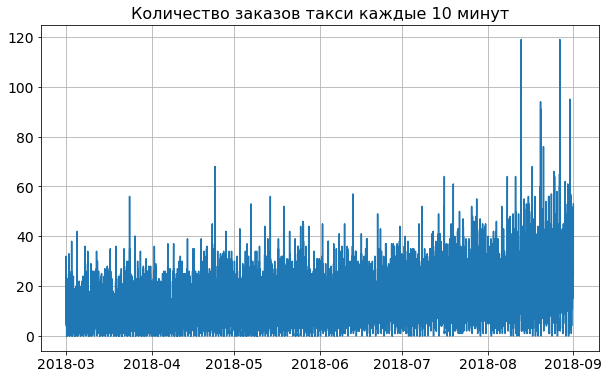

In [11]:
plot_taxi(data,
          '''Количество заказов такси каждые 10 минут''',
          '-')

Очевидно, что данный график малоинформативен. Однако даже на таком графике можно сделать предварительный вывод, что за период с начала марта до конца августа количество заказов такси, сделанных каждые 10 минут, увеличивается.

Но **по условию задачи** нам требуется предсказать количество заказов такси **на следующий час**. 

Поэтому выполним **ресемплирование данных** по одному часу, суммируя количество заказов, сделанных в каждом часе:

In [12]:
#выполняем ресемплирование данных по одному часу
data = data.resample('1H').sum()

Повторим график для данных после ресемплирования:

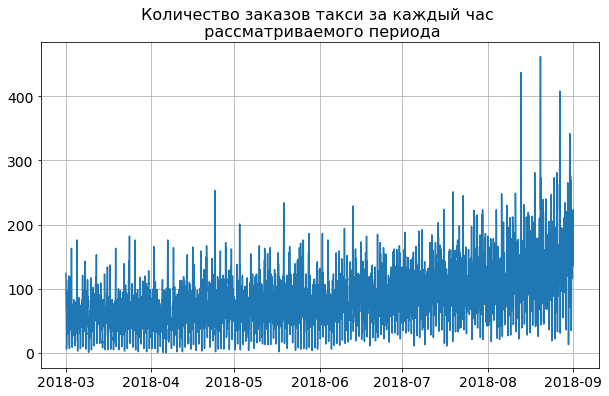

In [13]:
plot_taxi(data,
          '''Количество заказов такси за каждый час \n рассматриваемого периода''',
          '-')

График стал более "прозрачным", наклон вверх с увеличением времени ещё более очевидным, но с данными ещё предстоит поработать, чтобы сделать дополнительные выводы.

Выведем повторно информацию о таблице после ресемплирования:

In [14]:
#вывод общей информации о таблице после ресеплирования по 1 часу
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


И характеристику выборки:

In [15]:
# характеристика выборки количества заказов за каждые 60 минут рассматриваемого периода
data.describe()

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


В среднем за весь рассматриваемый период совершалось около 84 поездок в час. Но усреднять данные всего периода несовсем корректно, требуется более детальное исследование.

### Вывод

На стадии подготовки данных удалось извлечь следующую информацию:
- Формат даты и времени корректно считался при загрузке данных, учитывается в таблице в качестве индекса (`DatetimeIndex`).
- В нашем распоряжении данные за период с *01 марта 2018 года* по *31 августа 2018 года*.
- Мы имеем около **26,5 тысяч** объектов временного ряда при фиксации количества заказов *каждые 10 минут*.
- В среднем каждые 10 минут происходит около *14 заказов*, медиана - 13.
- В таблице на данный момент два признака: дата и время, а также количество заказов - целевой признак.
- Отсутствуют пропущенные значения.
- По условию задачи нам требуется предсказать количество заказов такси **на следующий час**, по этой причине успешно выполнено *ресемплирование данных по одному часу*.
- Количество объектов после ресемплирования уменьшилось до примерно **4,4 тыс. штук**.

Предварительно можно утверждать, что данных для исследования достаточно. Данные готовы к дальнейшему анализу.

## Анализ

На стадии анализа данных сделаем:
- обзор некоторых характеристик,
- посмотрим тренды и сезонность.

### Обзор исходных данных

В рамках обзора исходных данных построим некоторые графики.

- **Среднее количество заказов такси в час по месяцам**:

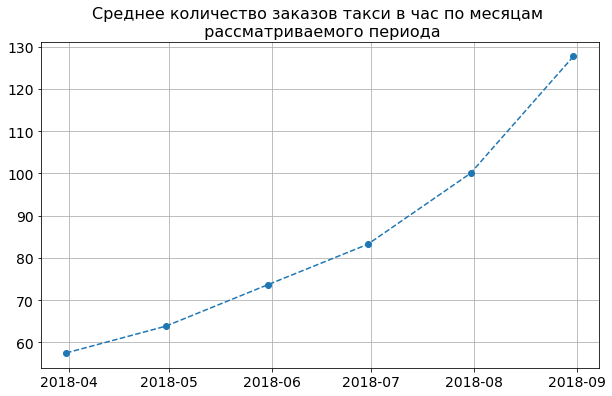

In [16]:
plot_taxi(data.resample('1M').mean(),
          '''Среднее количество заказов такси в час по месяцам \n рассматриваемого периода''',
          'o--')

Данный график подтверждает ранее сделанный вывод: за период с марта по август увеличивается количество заказов, сделанных в среднем за 1 час в течение месяца. 

Наибольшее количество заказов в час в среднем сделано в августе - около 130 штук. Это не противоречит здравому смыслу: *количество заказов такси в аэропорту наибольшее в пик сезона отпусков (и возврата из отпусков перед школой/учебой)*.

- **Суммарное количество заказов такси в месяц**:

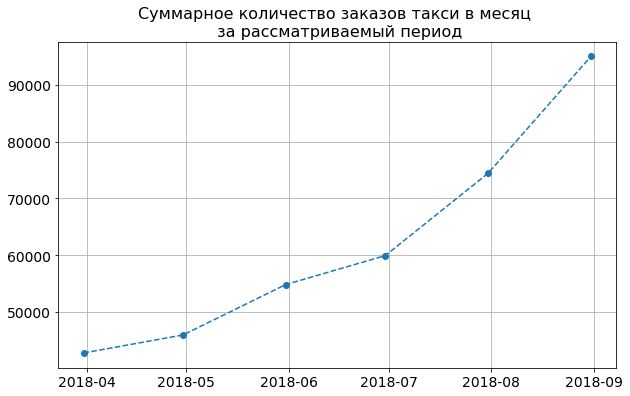

In [17]:
plot_taxi(data.resample('1M').sum(),
          '''Суммарное количество заказов такси в месяц \n за рассматриваемый период''',
          'o--')

Суммарное количество заказов такси в месяц увеличивается с течением времени в рамках рассматриваемого периода: от менее 50 тыс. в мае до более 90 тыс. в августе. 

- **Суммарное суточное количество заказов такси**:

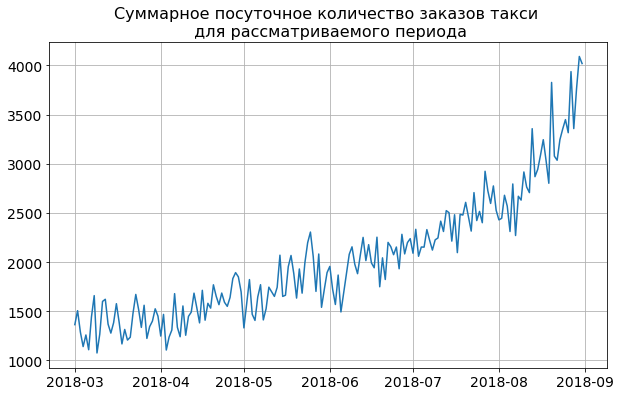

In [18]:
plot_taxi(data.resample('1D').sum(),
          '''Суммарное посуточное количество заказов такси \n для рассматриваемого периода''',
          '-')

В отличие от данных за месяц при рассмотрении суточного количества заказов наблюдается некоторая "пила". Колебания графика могут объясняться разницей в количестве заказов внутри одной недели, то есть по дням недели. Тем не менее, увеличение количества заказов по мере приближения к концу августа сохраняется.

### Тренды и сезонность

Чтобы лучше понимать временной ряд, разберём тренды и сезонность.

**Тренд** — плавное изменение среднего значения ряда без повторяющихся закономерностей. Например, ежегодное увеличение объёма продаж авиабилетов.

**Сезонность** — циклично повторяющиеся закономерности во временном ряду. Допустим, рост продаж авиабилетов летом.

Используем функцию `seasonal_decompose()` из модуля `tsa.seasonal` библиотеки `statsmodels`. Она раскладывает временной ряд на три составляющие: тренд, сезонность и остаток. Остаток - это компонента, которая не объясняется трендом и сезонностью, это шум.

Функция `seasonal_decompose()` принимает временной ряд, а возвращает объект структуры `DecomposeResult`. В нём есть нужные атрибуты:
- `decomposed.trend` — тренд;
- `decomposed.seasonal` — сезонная составляющая;
- `decomposed.resid` — остаток декомпозиции.

- **Тренды и сезонность для суточного количества заказов такси**:

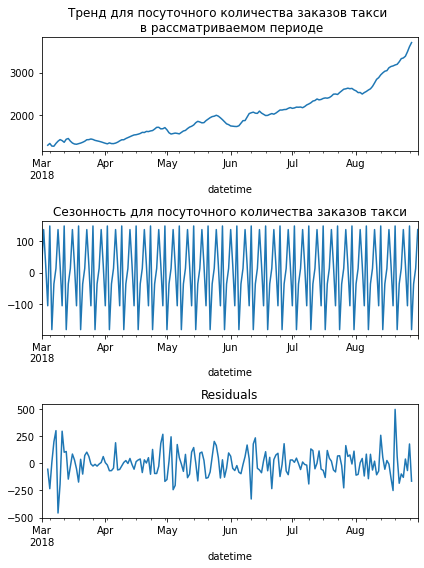

In [19]:
decomposed =  seasonal_decompose(data.resample('1D').sum())

plt.figure(figsize=(6, 8))
plt.subplot(311)

# Чтобы график корректно отобразился, указываем его
# оси ax, равными plt.gca() (англ. get current axis,
# получить текущие оси)

decomposed.trend.plot(ax=plt.gca())
plt.title('Тренд для посуточного количества заказов такси \n в рассматриваемом периоде')
plt.subplot(312)

decomposed.seasonal.plot(ax=plt.gca()) 

plt.title('Сезонность для посуточного количества заказов такси')
plt.subplot(313)

decomposed.resid.plot(ax=plt.gca()) 

plt.title('Residuals')

plt.tight_layout()

Тренды и сезонность зависят от масштаба данных. Например, нельзя увидеть закономерности, повторяющиеся каждое лето, если есть данные только за год. В данном случае *тренд связан с временем года*: в период отпусков количество заказов такси в аэропорту увеличивается.

Сезонность на представленном графике связана с периодом меньше месяца, исследуем её дальше.

Построим сезонную составляющую для периода **05 марта - 18 марта 2018 года**:

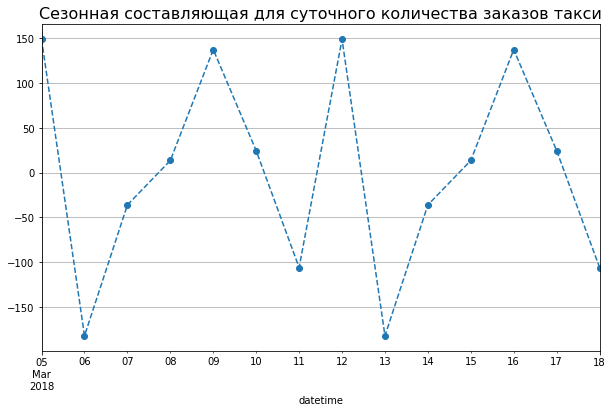

In [20]:
#размер графика
plt.figure(figsize=(10,6))

decomposed.seasonal['2018-03-05':'2018-03-18'].plot(ax=plt.gca(), style='o--')
    
#название графика
plt.title('Сезонная составляющая для суточного количества заказов такси',
          fontsize=16)


#отображение сетки
plt.grid()

plt.show()

Если мы выведем дни недели для рассматриваемого периода:

In [21]:
data['2018-03-05':'2018-03-18'].resample('1D').sum().index.dayofweek

Int64Index([0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6], dtype='int64', name='datetime')

Тогда убедимся, что сезонность в данном случае связана с днём недели:
- пик суточного количества заказов приходится на понедельник и пятницу,
- во вторник наблюдается спад количества заказов,
- со вторника по пятницу количество заказов увеличивается,
- с пятницы до воскресения снижается,
- затем неделя снова начинается пиком заказов.

Повторим действие **для ежечасных данных**:

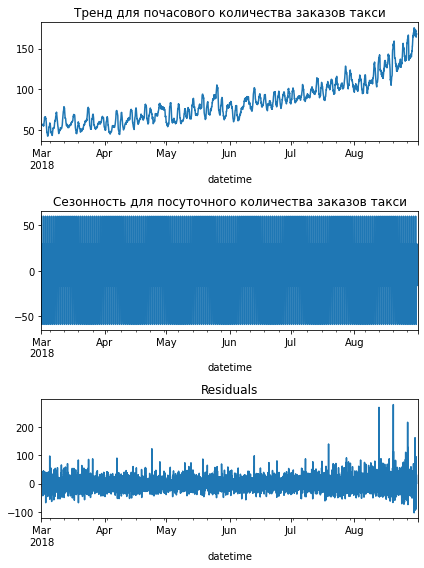

In [22]:
decomposed =  seasonal_decompose(data)

plt.figure(figsize=(6, 8))
plt.subplot(311)

# Чтобы график корректно отобразился, указываем его
# оси ax, равными plt.gca() (англ. get current axis,
# получить текущие оси)

decomposed.trend.plot(ax=plt.gca())
plt.title('Тренд для почасового количества заказов такси')
plt.subplot(312)

decomposed.seasonal.plot(ax=plt.gca()) 

plt.title('Сезонность для посуточного количества заказов такси')
plt.subplot(313)

decomposed.resid.plot(ax=plt.gca()) 

plt.title('Residuals')

plt.tight_layout()

Сезонная составляющая неинформативна, проанализируем её дополнительно:

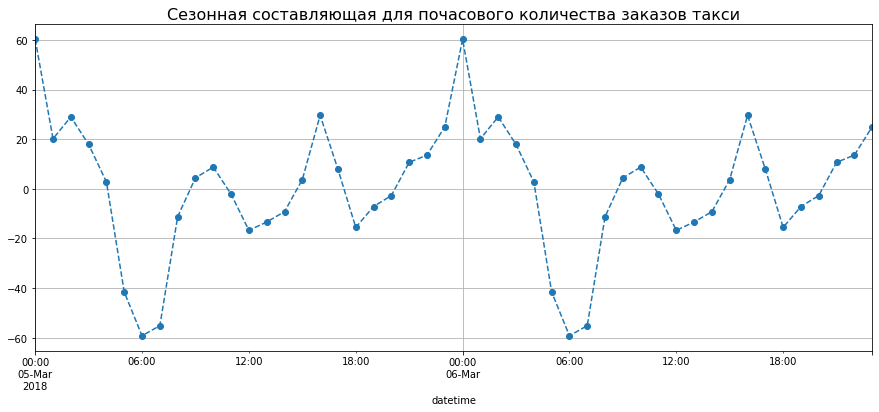

In [23]:
#размер графика
plt.figure(figsize=(15,6))

decomposed.seasonal['2018-03-05':'2018-03-06'].plot(ax=plt.gca(), style='o--')
    
#название графика
plt.title('Сезонная составляющая для почасового количества заказов такси',
          fontsize=16)


#отображение сетки
plt.grid()

plt.show()

С помощью встроенного инструмента нам удалось проследить некоторую зависимость для почасового количества заказов такси:
- пик заказов в аэропорту приходится на ночное время, действительно, интенсивность передвижения общественного транспорта к этому времени снижается,
- провал количества заказов такси - в 6 утра,
- с полуночи до 6 утра спад количества заказов,
- с 6 утра до 10 утра рост количества заказов, причем допольно интенсивный,
- с 10 часов утра до примерно 20 ч наблюдается два спада и один пик в 16 ч, но в среднем за это время количество заказов примерно одинаково при визуальном анализе графика
- с 20 ч до 24 ч интенсивный рост количества заказов.

### Вывод

**Обзор исходных данных** позволяет сделать следующий вывод:
- за период с марта по август *увеличивается количество заказов*, сделанных в среднем за 1 час в течение месяца.
- наибольшее количество заказов в час в среднем *сделано в августе* - около 130 штук. Это не противоречит здравому смыслу: количество заказов такси в аэропорту наибольшее в пик сезона отпусков (и возврата из отпусков перед школой/учебой).
- суммарное количество заказов такси в месяц *увеличивается с течением времени* в рамках рассматриваемого периода: от менее 50 тыс. в мае до более 90 тыс. в августе.

**Сезонность** при рассмотрении **суточного количества заказов** связана с днём недели:
- пик суточного количества заказов приходится на понедельник и пятницу,
- во вторник наблюдается спад количества заказов,
- со вторника по пятницу количество заказов увеличивается,
- с пятницы до воскресения снижается,
- затем неделя снова начинается пиком заказов.

С помощью встроенного инструмента нам удалось проследить некоторую сезонность для **почасового количества заказов такси**:
- пик заказов в аэропорту приходится на ночное время,
- провал количества заказов такси - в 6 утра,
- с полуночи до 6 утра спад количества заказов,
- с 6 утра до 10 утра рост количества заказов, причем допольно интенсивный,
- с 10 часов утра до примерно 20 ч наблюдается два спада и один пик в 16 ч, но в среднем за это время количество заказов примерно одинаково при визуальном анализе графика,
- с 20 ч до 24 ч интенсивный рост количества заказов.

## Обучение

Задача *предсказания количества заказов такси на следующий час* относится к задаче **прогнозирования временного ряда**, которая состоит в построении модели, предсказывающей по историческим данным будущие значения.

Промежуток времени в будущем, на который строится прогноз, называется **горизонтом прогнозирования**.

Количество заказов такси — это числа, следовательно, перед нами задача регрессии для временных рядов.

### Создание признаков

Создадим признаки для горизонта прогнозирования в один шаг:
- **Календарные признаки** (Во многих данных тренды и сезонность привязаны к конкретной дате. Тип `datetime64` в Pandas уже содержит нужную информацию, осталось лишь представить её как отдельные столбцы)
- **«Отстающие значения»** (Предыдущие значения временного ряда подскажут, будет ли функция x(t) расти или уменьшаться)
- **Скользящее среднее** (Скользящее среднее как признак задаёт общий тренд временного ряда.)

Важно: скользящее среднее в моменте $t$ учитывает текущее значение ряда $x(t)$. Это некорректно: целевой признак «убегает» в признаки. Вычисление скользящего среднего **не должно включать** в себя текущее значение ряда.

Напишем функцию `make_features()` для создания признаков, внутри которой:

1. Будем прибавлять к таблице четыре новых **календарных признака** (год, месяц, день и день недели). Имена новых столбцов: `year`, `month`, `day`, `dayofweek`.
    
2. Будем вычислять **отстающие значения**. Для этого добавим новый аргумент `max_lag`, который задаст максимальный размер отставания. Названия новых признаков: `lag_1`, `lag_2` — и до величины `max_lag`.

3. Будем вычислять **скользящее среднее** и добавлять его как признак `rolling_mean`. Для этого в функцию `make_features()` добавим новый аргумент `rolling_mean_size`, который задаст ширину окна. Будем помнить, что текущее значение ряда для расчёта скользящего среднего применять нельзя.

Перейдём к записи `make_features()`:

In [24]:
def make_features(df, max_lag, rolling_mean_size):

    df['dayofweek'] = df.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)

    df['rolling_mean'] = df['num_orders'].shift().rolling(rolling_mean_size).mean()

Применем функцию для произвольных параметров и выведем несколько строк:

In [25]:
make_features(data, 4, 4)

In [26]:
data.head()

,num_orders,dayofweek,lag_1,lag_2,lag_3,lag_4,rolling_mean
datetime,,,,,,,
2018-03-01 00:00:00,124,3,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,124.0,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,85.0,124.0,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,71.0,85.0,124.0,NaN,NaN
2018-03-01 04:00:00,43,3,66.0,71.0,85.0,124.0,86.5


Очевидно, что функция работает корректно. Но нам предстоит выбрать оптимальные параметры: размер отставания и ширину окна.
Поэтому вернём датафрейм в исходное состояние:

In [27]:
data = data[['num_orders']]

Проверим результат:

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 198.0 KB


### Обучающая и тестовые выборки

По исходным данным создадим обучающую (`train`) и тестовую (`test`) выборки. Перемешивать выборки в задаче прогнозирования временного ряда нельзя. Данные обучающей выборки должны предшествовать данным тестовой. Иначе тестирование модели будет некорректным: **модель не должна обучаться на данных из будущего**.

Сделаем тестовую выборку размером 10% от исходных данных.

Функция `train_test_split()` из модуля `sklearn.model_selection` по умолчанию перемешивает данные. Поэтому укажем аргумент `shuffle` (англ. «перетасовывать») равным `False`, чтобы разделить данные корректно:

In [29]:
train, test = train_test_split(data, shuffle=False, test_size=0.1)
print('Обучающая выборка:')
print(train.shape)
print('Тестовая выборка:')
print(test.shape) 

Обучающая выборка:
(3974, 1)
Тестовая выборка:
(442, 1)


Напечатаем на экране минимальные и максимальные значения индексов выборок. Они нужны, чтобы убедиться в корректности деления.

In [30]:
print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())

2018-03-01 00:00:00 2018-08-13 13:00:00
2018-08-13 14:00:00 2018-08-31 23:00:00


Всё верно, данные разбили корректно:
- обучающая выборка заканчивается в 13:00 13 августа 2018,
- тестовая начинается в 14:00 13 августа 2018.

**Важно**, что качество модели будет зависеть от *количества признаков*, которое мы сформируем с помощью функции `make_features()`. Нам предстоит исследовать не только гиперпараметры выбранной модели, но и как количество признаков повлияет на качество. Поэтому цель данного раздела показать, что операция выделения тестовой выборки выполняется корректно. В дальнейшем будем делать это повторно в процессе выбора оптимального количества признаков, которое зависит в первую очередь **от максимального размера отставания**. 

### Модель линейной регрессии

Начнем с более простой модели - **линейной регрессии**. Данный пример показателен: мы можем изменять только максимальный размер отставания и ширину окна. Затем посмотрим как эти параметры влияют на $RMSE$. 

Важно, чтобы многократное варьирование максимального размера отставания и удаление пропусков не приводило к искажению исходного датафрейма, поэтому перед началом подбора параметров выведем на экран его рамерность:

In [31]:
data.shape

(4416, 1)

Варьировать размер отставания и ширину окна будем с помощью цикла.

Запишем цикл:

In [32]:
%%time

rmse_array_lr_train = []        #здесь будем записывать RMSE на обучающей выборке для каждого шага
rmse_array_lr_test = []         #здесь будем записывать RMSE на тестовой выборке для каждого шага
max_lag_array_lr = []           #сюда будем сохранять текущее значение максимального размера отставания
rolling_mean_size_array_lr = [] #в этом массиве будем сохранять ширину окна

for max_lag in range(1,72,2):   #запускаем цикл по максимальному размеру отставания
    
    for rolling_mean_size in range(1,51):  #запускаем цикл по ширине окна
        
        make_features(data,                #на каждом шаге вызываем функцию `make_features`
                      max_lag,             #с максимальным размером отставания внешнего цикла
                      rolling_mean_size)   #с шириной окна, изменяющейся во вложенном цикле
        
        #на каждом шаге цикла делим выборку на обучающую и тестовую
        train, test = train_test_split(data, shuffle=False, test_size=0.1)
        
        #удаляем пропуски
        train = train.dropna()
        
        #создаём модель линейной регрессии
        model = LinearRegression()
        
        #выделяем признаки и целевой признак обучающей выборки
        train_features = train.drop('num_orders',axis=1)
        train_target = train['num_orders']
                
        #выделяем признаки и целевой признак тестовой выборки
        test_features = test.drop('num_orders',axis=1)
        test_target = test['num_orders']
        
        #обучаем модель
        model.fit(train_features,train_target)
        
        #вычисляем RMSE
        rmse_lr_train = mean_squared_error(train_target, model.predict(train_features), squared=False)
        rmse_lr_test = mean_squared_error(test_target, model.predict(test_features), squared=False)
        
        rmse_array_lr_train.append(rmse_lr_train)                  #сохраняем RMSE на обучающей выборке
        rmse_array_lr_test.append(rmse_lr_test)                    #сохраняем RMSE на тестовой выборке
        rolling_mean_size_array_lr.append(rolling_mean_size)       #сохраняем текущее значение ширины окна
        max_lag_array_lr.append(max_lag)                           #сохраняем текущее значение максимального размера отставания
        
        data = data[['num_orders']]                                #на каждом шаге будем избавляться от лишних столбцов

CPU times: user 3min 49s, sys: 4min 5s, total: 7min 54s
Wall time: 7min 56s


Контролируем размерность:

In [33]:
data.shape

(4416, 1)

Отлично, мы не потеряли ни одной строки (ни одного объекта).

**Создадим датафрейм** с результатами:

In [34]:
#датафрейм с результатами исследования
result_lr = pd.DataFrame({'rmse_lr_train':np.array(rmse_array_lr_train),
                          'rmse_lr_test':np.array(rmse_array_lr_test),
                          'rolling_mean_size':np.array(rolling_mean_size_array_lr),
                          'max_lag':np.array(max_lag_array_lr)})

Сколько всего точек трехмерного пространства мы рассмотрели:

In [35]:
len(result_lr)

1800

Ищем строчку, в которой ключевая метрика $RMSE$ минимальна:

In [36]:
result_lr[result_lr['rmse_lr_train']==result_lr['rmse_lr_train'].min()]

,rmse_lr_train,rmse_lr_test,rolling_mean_size,max_lag
1779,23.210272,41.817024,30,71


И построим график зависимости $RMSE$ на обучающей выборке от `rolling_mean` и `max_lag`:

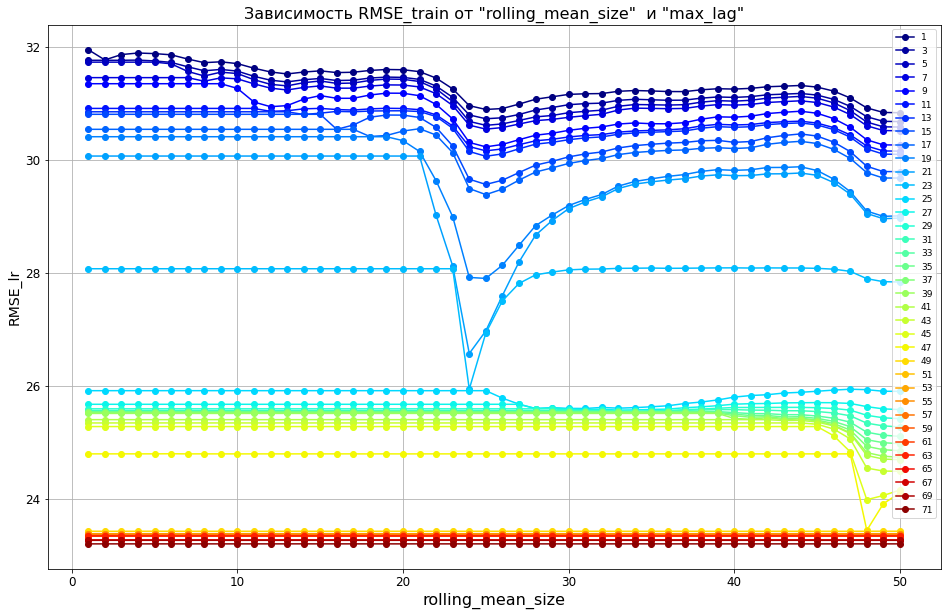

In [37]:
#размер графика
plt.figure(figsize=(16,10))

#выбор цветовой карты
colors = plt.cm.jet(np.linspace(0,2,max(max_lag_array_lr)+1))

for max_lag,c in zip(range(1,(max(max_lag_array_lr)+1),2),colors):
    #строим график
    plt.plot(result_lr[result_lr['max_lag']==max_lag]['rolling_mean_size'],
             result_lr[result_lr['max_lag']==max_lag]['rmse_lr_train'],
             '-o',
             label=max_lag,
             color=c
            )

#название графика
plt.title('Зависимость RMSE_train от "rolling_mean_size"  и "max_lag"', fontsize=16)

#подписи осей
plt.xlabel('rolling_mean_size', fontsize=16)
plt.ylabel('RMSE_lr', fontsize=14)

#отображение сетки
plt.grid()

#задаём шаг сетки по оси по оси абсцисс и по оси ординат
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=9)
plt.show()

Полученный график RMSE на обучающей выборке позволяет нам сделать следующие выводы:
1. При значениях размера отставания ниже 21 наблюдается влияние на $RMSE$ ширины окна для скользящего среднего: при некоторых значениях наблюдается явный минимум метрики.
2. Чем больше максимальный размер отставания, тем меньшее влияние на $RMSE$ оказывает ширина окна для скользящего среднего. Это объяснимо: увеличиваем размер отставания, увеличиваем количество признаков, поэтому влияние скользящего среднего становится менее заметно для модели.
3. Нам необходимо сделать предсказания на следующий час. В этом случае, какой оптимальный максимальный размер отставания может быть? Казалось бы может хватить 24 позиций, так как в сутках 24 часа, но нет. Мы помним, что сезонность была связана и с днями недели, поэтому, по всей видимости, увеличение максимального размера отставания свыше 24 продолжает приводить к уменьшению $RMSE$.
4. При значениях `max_lag` свыше 51 уменьшение $RMSE$ уже не так значительно, как на предыдущих шагах.

В соответствии с условием поставленной задачи метрика $RMSE$ на тестовой выборке *не должна превышать 48*. Результат линейной регрессии на обучающей выборке **выглядит многообещающим**. Так ли это? Ответ на этот вопрос поможет найти *тестовая выборка*.

Честнее было бы, наверное, выбрать лучший результат на обучающей и загнать его в тест в конце работы. Но большое количетсво признаков заставляет усомниться в качестве, так как модель может быть склонна к переобучению. 

Поэтому воспроизведём график снова, но для тестовой выборки. Это позволит нам увидеть так ли гладко всё на тестовой выборке, как и на обучающей: 

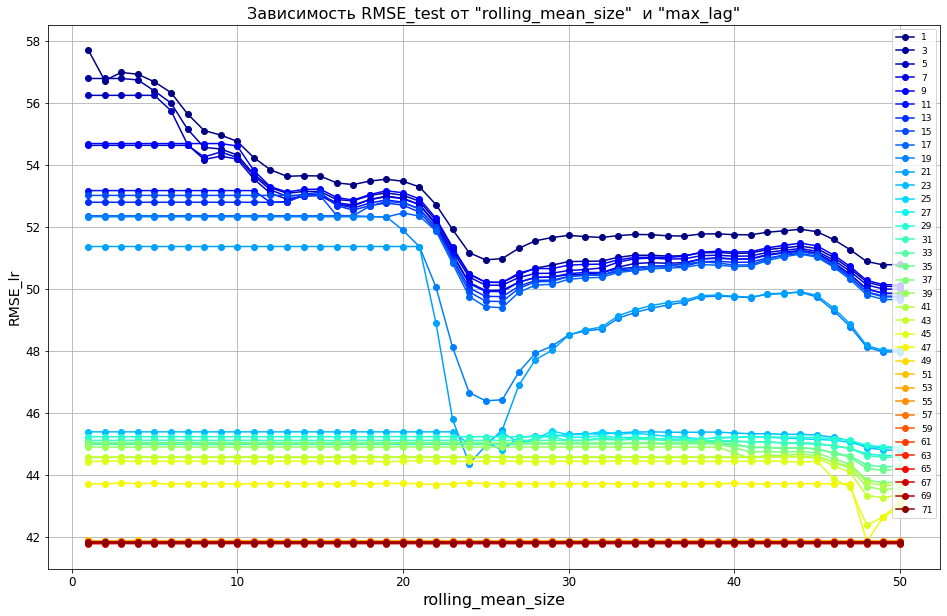

In [38]:
#размер графика
plt.figure(figsize=(16,10))

#выбор цветовой карты
colors = plt.cm.jet(np.linspace(0,2,max(max_lag_array_lr)+1))

for max_lag,c in zip(range(1,(max(max_lag_array_lr)+1),2),colors):
    #строим график
    plt.plot(result_lr[result_lr['max_lag']==max_lag]['rolling_mean_size'],
             result_lr[result_lr['max_lag']==max_lag]['rmse_lr_test'],
             '-o',
             label=max_lag,
             color=c
            )

#название графика
plt.title('Зависимость RMSE_test от "rolling_mean_size"  и "max_lag"', fontsize=16)

#подписи осей
plt.xlabel('rolling_mean_size', fontsize=16)
plt.ylabel('RMSE_lr', fontsize=14)

#отображение сетки
plt.grid()

#задаём шаг сетки по оси по оси абсцисс и по оси ординат
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=9)
plt.show()

Полученный график позволяет наглядно убедиться, что всё **не так "гладко" в прямом смысле этого слова**:
- результаты $RMSE$ на тестовой выборке хуже, чем на обучающей,
- влияние ширины окна более ощутимо, чем на обучающей выборке, например, улучшение на обучающей составляло максимум от 31 до 27 при максимальном размере окна около 21-23, на тестовой выборке мы видим, что в некоторых случаях с увеличением ширины окна метрика снижается почти на 10 единиц,
- с увеличением максимальной глубины отставания увеличивается качество, так как падает метрика $RMSE$,
- для значений отставания менее 25 видно как ширина окна после 24 ч **ухудшает** результат пока не охватит вторые сутки, после которых начинается спад RMSE, но не такой как для первых суток.

### Модель решающего дерева

Рассмотрим модель решающего дерева, помимо `max_lag` и `rolling_mean_size` будем варьировать гиперпараметр - максимальную глубину (`max_depth`) с помощью цикла:

In [39]:
%%time

rmse_array_dtc_train = []        #здесь будем записывать RMSE на обучающей выборке для каждого шага
rmse_array_dtc_test = []         #здесь будем записывать RMSE на тестовой выборке для каждого шага
max_lag_array_dtc = []           #сюда будем сохранять текущее значение максимального размера отставания
rolling_mean_size_array_dtc = [] #в этом массиве будем сохранять ширину окна
array_depth_dtc = []             #в этом массиве будем сохранять глубину решающего дерева


for max_lag in range(1,72,4):              #запускаем цикл по максимальному размеру отставания
    
    for rolling_mean_size in range(1,51,4):  #запускаем цикл по ширине окна
        
        for depth in range(1,15,1):          #запускаем цикл по глубине решающего дерева
        
            make_features(data,                #на каждом шаге вызываем функцию `make_features`
                          max_lag,             #с максимальным размером отставания внешнего цикла
                          rolling_mean_size)   #с шириной окна, изменяющейся во вложенном цикле
            
            #на каждом шаге цикла делим выборку на обучающую и тестовую
            train, test = train_test_split(data, shuffle=False, test_size=0.1)
            
            #удаляем пропуски
            train = train.dropna()
            
            #создаём модель решающего дерева
            model = DecisionTreeRegressor(random_state=12345, 
                                          max_depth=depth)
            
            #выделяем признаки и целевой признак обучающей выборки
            train_features = train.drop('num_orders',axis=1)
            train_target = train['num_orders']
                    
            #выделяем признаки и целевой признак тестовой выборки
            test_features = test.drop('num_orders',axis=1)
            test_target = test['num_orders']
            
            #обучаем модель
            model.fit(train_features,train_target)
            
            #вычисляем RMSE
            rmse_dtc_train = mean_squared_error(train_target, model.predict(train_features), squared=False)
            rmse_dtc_test = mean_squared_error(test_target, model.predict(test_features), squared=False)
            
            rmse_array_dtc_train.append(rmse_dtc_train)                 #сохраняем RMSE на обучающей выборке
            rmse_array_dtc_test.append(rmse_dtc_test)                   #сохраняем RMSE на тестовой выборке
            rolling_mean_size_array_dtc.append(rolling_mean_size)       #сохраняем текущее значение ширины окна
            max_lag_array_dtc.append(max_lag)                           #сохраняем текущее значение максимального размера отставания
            array_depth_dtc.append(depth)                               #сохраняем текущее значение глубины дерева
            
            data = data[['num_orders']]                                 #на каждом шаге будем избавляться от лишних столбцов

CPU times: user 4min 32s, sys: 4.54 s, total: 4min 36s
Wall time: 4min 38s


Снова проверим размерность:

In [40]:
data.shape

(4416, 1)

Создаём датафрейм с результатами:

In [41]:
#датафрейм с результатами исследования
result_dtc = pd.DataFrame({'rmse_dtc_train':np.array(rmse_array_dtc_train),
                           'rmse_dtc_test':np.array(rmse_array_dtc_test),
                           'rolling_mean_size':np.array(rolling_mean_size_array_dtc),
                           'max_lag':np.array(max_lag_array_dtc),
                           'depth_dtc':np.array(array_depth_dtc) })

Сколько точек четырехмерного пространства на этот раз мы проанализировали:

In [42]:
len(result_dtc)

3276

Ознакомимся с лучшим результатом на обучающей выборке:

In [43]:
result_dtc[result_dtc['rmse_dtc_train']==result_dtc['rmse_dtc_train'].min()]

,rmse_dtc_train,rmse_dtc_test,rolling_mean_size,max_lag,depth_dtc
2939,5.599952,74.475063,5,65,14


И на тестовой:

In [44]:
result_dtc[result_dtc['rmse_dtc_test']==result_dtc['rmse_dtc_test'].min()]

,rmse_dtc_train,rmse_dtc_test,rolling_mean_size,max_lag,depth_dtc
2357,22.622957,46.932989,49,49,6


Сложно представить результаты четырехмерного пространства наглядно. Поэтому построим график зависимости $RMSE$ на обучающей выборке от глубины решающего дерева, понимая, что для каждого значения глубины будет несколько результатов, так как мы варьировали и другие параметры:

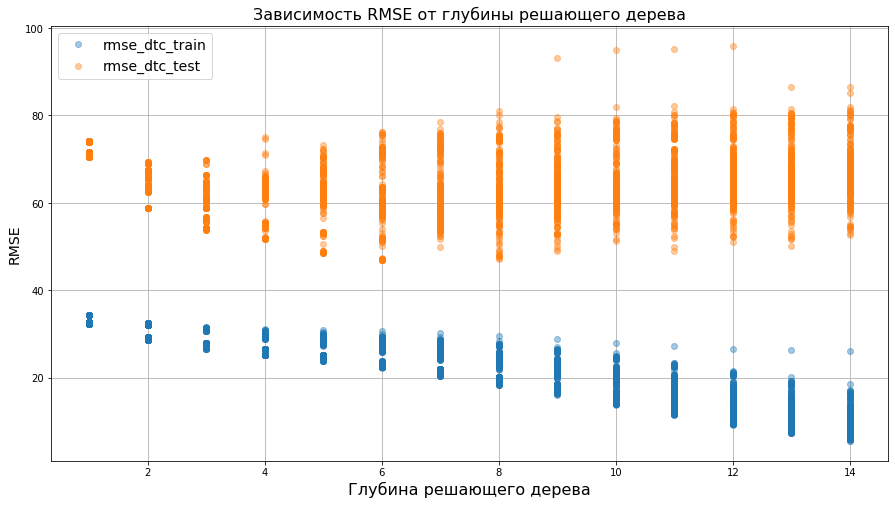

In [45]:
#размер графика
plt.figure(figsize=(15,8))

#строим график
for name in ['rmse_dtc_train',
             'rmse_dtc_test']:
    plt.plot(result_dtc['depth_dtc'], 
             result_dtc[name],
             'o',
             label=name,
             alpha=0.4
            )

#название графика
plt.title('Зависимость RMSE от глубины решающего дерева', fontsize=16)

#подписи осей
plt.xlabel('Глубина решающего дерева', fontsize=16)
plt.ylabel('RMSE', fontsize=14)

#отображение сетки
plt.grid()
plt.legend(fontsize=14)
plt.show()

Этот график позволяет сделать вывод, что все наши попытки улучшения модели решающего дерева не привели к искомому результату: мы не смогли получить $RMSE$ ниже 48. Даже если подглядеть в ответы, то там только единичные случаи, когда $RMSE$ менее 48.

Напоследок отметим, что причина, по которой мы ограничили глубину решающего дерева значением 15 приведена ниже. На графике видно, что $RMSE$ снижается до практически нулевых значений, когда количество деревьев достигает 20. То есть модель "зазубривает" ответы, показывает отличный результат на обучающей выборке, но на тестовой уходит "вразнос", что для нас крайне нежелательно.

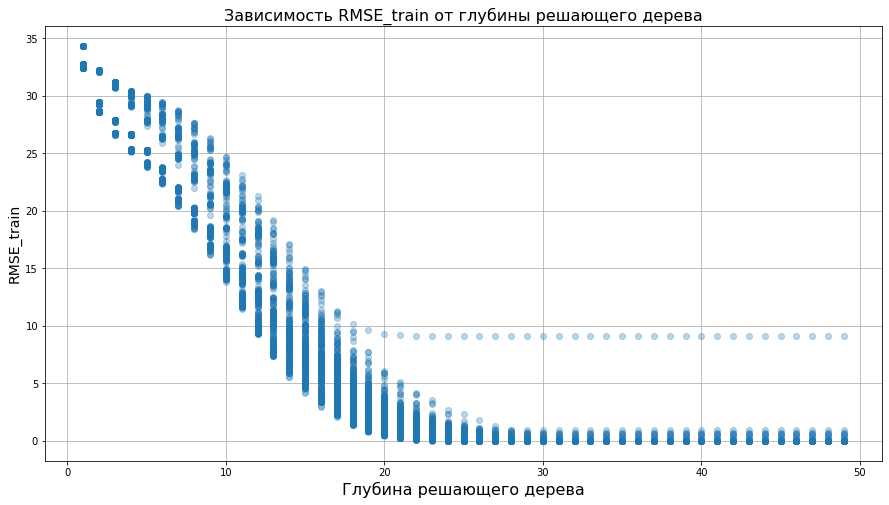

### Модель случайного леса

Усложним решение ещё больше: рассмотрим модель **случайного леса**. 

У нас будет *4 вложенных цикла*: 
- по максимальному размеру отставания, 
- по ширине окна, 
- по количеству деревьев,
- по глубине решающего дерева.

В силу ограниченности вычислительных мощностей шаг сделаем грубым.

Запишем цикл:

In [46]:
%%time

rmse_array_rfr_train = []        #здесь будем записывать RMSE на обучающей выборке для каждого шага
rmse_array_rfr_test = []         #здесь будем записывать RMSE на тестовой выборке для каждого шага
max_lag_array_rfr = []           #сюда будем сохранять текущее значение максимального размера отставания
rolling_mean_size_array_rfr = [] #в этом массиве будем сохранять ширину окна
array_depth_rfr = []             #в этом массиве будем сохранять глубину решающего дерева
array_est_rfr = []               #здесь сохраним количество деревьев для каждого шага цикла


for max_lag in range(1,51,9):                  #запускаем цикл по максимальному размеру отставания
    
    for rolling_mean_size in range(1,51,9):    #запускаем цикл по ширине окна
       
        for est in range(10,61,20):            #цикл по количеству деревьев
            
            for depth in range(3,10,1):          #запускаем цикл по глубине решающего дерева
            
                make_features(data,                #на каждом шаге вызываем функцию `make_features`
                              max_lag,             #с максимальным размером отставания внешнего цикла
                              rolling_mean_size)   #с шириной окна, изменяющейся во вложенном цикле
                
                #на каждом шаге цикла делим выборку на обучающую и тестовую
                train, test = train_test_split(data, 
                                               shuffle=False, 
                                               test_size=0.1)
                #удаляем пропуски
                train = train.dropna()
                
                #создаём модель решающего дерева
                model = RandomForestRegressor(random_state=12345,
                                              max_depth=depth,
                                              n_estimators=est)
                
                #выделяем признаки и целевой признак обучающей выборки
                train_features = train.drop('num_orders',axis=1)
                train_target = train['num_orders']
                        
                #выделяем признаки и целевой признак тестовой выборки
                test_features = test.drop('num_orders',axis=1)
                test_target = test['num_orders']
                
                #обучаем модель
                model.fit(train_features,train_target)
                
                #вычисляем RMSE
                rmse_rfr_train = mean_squared_error(train_target, model.predict(train_features), squared=False)
                rmse_rfr_test = mean_squared_error(test_target, model.predict(test_features), squared=False)
                
                rmse_array_rfr_train.append(rmse_rfr_train)                 #сохраняем RMSE на обучающей выборке
                rmse_array_rfr_test.append(rmse_rfr_test)                   #сохраняем RMSE на тестовой выборке
                rolling_mean_size_array_rfr.append(rolling_mean_size)       #сохраняем текущее значение ширины окна
                max_lag_array_rfr.append(max_lag)                           #сохраняем текущее значение максимального размера отставания
                array_depth_rfr.append(depth)                               #сохраняем текущее значение глубины дерева
                array_est_rfr.append(est)                                   #сохраняем текущее значение количества деревьев
                
                data = data[['num_orders']]                                 #на каждом шаге будем избавляться от лишних столбцов

CPU times: user 7min 49s, sys: 3.42 s, total: 7min 53s
Wall time: 7min 53s


Создадим датафрейм с результатами:

In [47]:
#датафрейм с результатами исследования
result_rfr = pd.DataFrame({'rmse_rfr_train':np.array(rmse_array_rfr_train),
                           'rmse_rfr_test':np.array(rmse_array_rfr_test),
                           'rolling_mean_size':np.array(rolling_mean_size_array_rfr),
                           'max_lag':np.array(max_lag_array_rfr),
                           'depth_rfr':np.array(array_depth_rfr), 
                           'est_rfr':np.array(array_est_rfr)})

Количество точек пятимерного пространства:

In [48]:
len(result_rfr)

756

Ознакомимся с лучшим результатом на обучающей выборке:

In [49]:
result_rfr[result_rfr['rmse_rfr_train']==result_rfr['rmse_rfr_train'].min()]

,rmse_rfr_train,rmse_rfr_test,rolling_mean_size,max_lag,depth_rfr,est_rfr
671,15.564602,44.312853,10,46,9,50


И на тестовой:

In [50]:
result_rfr[result_rfr['rmse_rfr_test']==result_rfr['rmse_rfr_test'].min()]

,rmse_rfr_train,rmse_rfr_test,rolling_mean_size,max_lag,depth_rfr,est_rfr
670,17.259206,43.161002,10,46,8,50


Для информации выведем график зависимости $RMSE$ на обучающей выборке от глубины решающего дерева и количества деревьев:

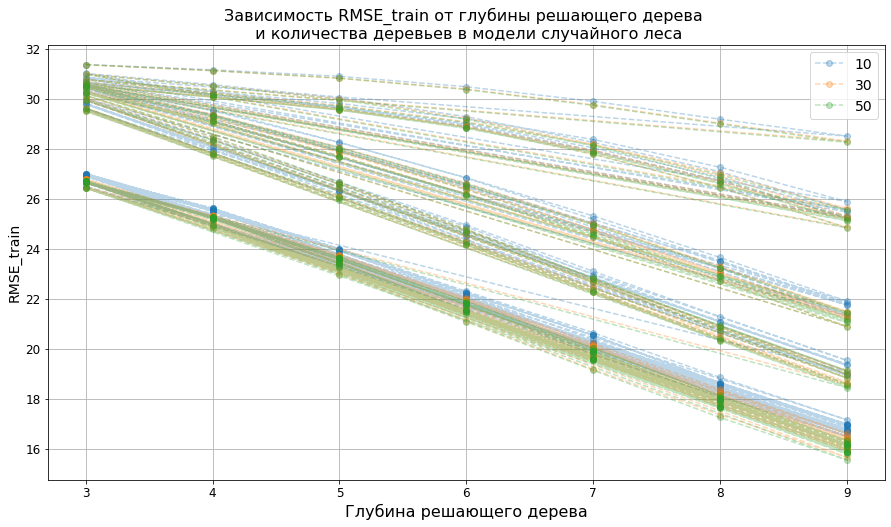

In [51]:
#размер графика
plt.figure(figsize=(15,8))

#выбор цветовой карты
#colors = plt.cm.jet(np.linspace(0,1,10))

for est in range(10,61,20):
    #строим график
    plt.plot(result_rfr[result_rfr['est_rfr']==est]['depth_rfr'],
             result_rfr[result_rfr['est_rfr']==est]['rmse_rfr_train'],
             '--o',
             label=est,
             alpha=0.3
            )

#название графика
plt.title('Зависимость RMSE_train от глубины решающего дерева \n и количества деревьев в модели случайного леса', fontsize=16)

#подписи осей
plt.xlabel('Глубина решающего дерева', fontsize=16)
plt.ylabel('RMSE_train', fontsize=14)

#отображение сетки
plt.grid()

#задаём шаг сетки по оси по оси абсцисс и по оси ординат
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=14)
plt.show()

Если построим график для тестовой выборки:

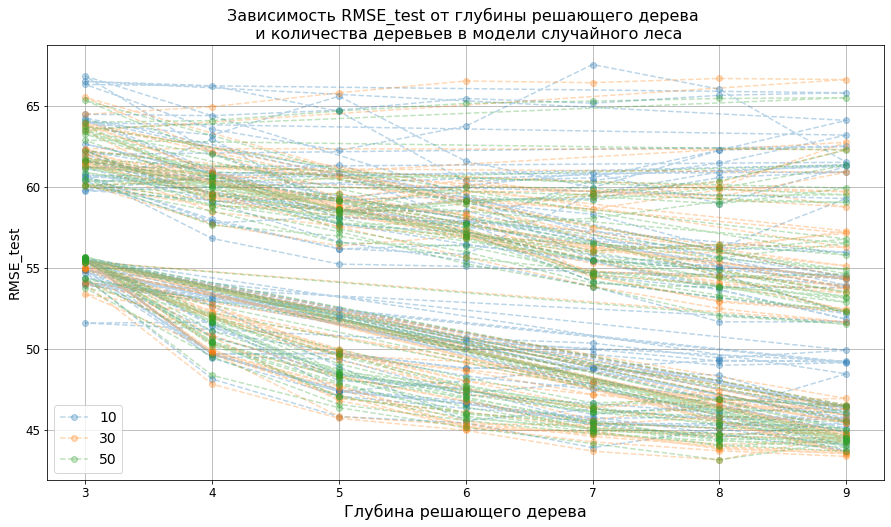

In [52]:
#размер графика
plt.figure(figsize=(15,8))

#выбор цветовой карты
#colors = plt.cm.jet(np.linspace(0,1,10))

for est in range(10,61,20):
    #строим график
    plt.plot(result_rfr[result_rfr['est_rfr']==est]['depth_rfr'],
             result_rfr[result_rfr['est_rfr']==est]['rmse_rfr_test'],
             '--o',
             label=est,
             alpha=0.3
            )

#название графика
plt.title('Зависимость RMSE_test от глубины решающего дерева \n и количества деревьев в модели случайного леса', fontsize=16)

#подписи осей
plt.xlabel('Глубина решающего дерева', fontsize=16)
plt.ylabel('RMSE_test', fontsize=14)

#отображение сетки
plt.grid()

#задаём шаг сетки по оси по оси абсцисс и по оси ординат
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=14)
plt.show()

То увидим, что реальная жизнь вносит свои коррективы: всё не так гладко, как на обучающей. Местами наблюдается оптимум по глубине решающего дерева, увеличение количества деревьев не всегда однозначно ведет к снижению метрики: при некоторых значениях есть минимумы, при других максимумы, то есть существенно влияние и других параметров.

Такой тип графика малоинфомративен для пятимерного пространства, но видно, что с увеличением глубины решающего дерева есть снижение метрики $RMSE$. 

В данном случае более ценный результат количественный, по которому мы обнаружили, что минимальная метрика $RMSE$ на обучающей выборке позволяет получить $RMSE$ на тестовой, удовлетворяющую заданному диапазону (менее 48).

### Вывод

Для обучения моделей, предсказывающих количество заказов такси на следующий час, были выбраны:
- модель линейной регрессии,
- модель решающего дерева,
- модель случайного леса.

Обучение моделей позволяет нам сделать следующие выводы:

**1. Для линейной регрессии** полученный график $RMSE$ на обучающей выборке позволил нам сделать следующие выводы:

1.1. При значениях размера отставания ниже 21 наблюдается влияние на $RMSE$ ширины окна для скользящего среднего: при некоторых значениях наблюдается явный минимум метрики.

1.2. Чем больше максимальный размер отставания, тем меньшее влияние на $RMSE$ оказывает ширина окна для скользящего среднего. Это объяснимо: увеличиваем размер отставания, увеличиваем количество признаков, поэтому влияние скользящего среднего становится менее заметно для модели.

1.3. Нам необходимо сделать предсказания на следующий час. В этом случае, какой оптимальный максимальный размер отставания может быть? Казалось бы может хватить 24 позиций, так как в сутках 24 часа, но нет. Мы помним, что сезонность была связана и с днями недели, поэтому, по всей видимости, увеличение максимального размера отставания свыше 24 продолжает приводить к уменьшению $RMSE$.

1.4. При значениях `max_lag` свыше 51 уменьшение $RMSE$ уже не так значительно, как на предыдущих шагах.

**2. Для решающего дерева:**

2.1. Все наши попытки улучшения модели решающего дерева не привели нас к искомому результату: мы не смогли получить $RMSE$ ниже 48.

2.2. $RMSE$  снижается до практически нулевых значений, когда количество деревьев достигает 20. То есть модель "зазубривает" ответы, показывает отличный результат на обучающей выборке, но на тестовой уходит "вразнос", что для нас крайне нежелательно.

**3. Для случайного леса:**
- Варьирование ширины окна, максимального размера отставания, глубины решающего дерева и количества деревьев приводит к образованию пятимерного пространства результатов (пятая характеристика - $RMSE$ на обучающей или тестовой выборке). Работа с таким количетсвом гиперпараметров требует больших вычислительных мощностей, поэтому перебор осуществлялся крупным шагом. Тем не менее удалось найти минимальную метрику $RMSE$ на обучающей выборке, которая приводит к удовлетворительному результату, чтобы было установлено при анализе результатов для тестовой выборки. 

Результаты показывают, что для подобных задач целесообразно выделять валидационную выборку.



## Тестирование

### Тестирование рассмотренных моделей

При решении поставленной задачи мы немного схитрили: вычисляли $RMSE$ на тестовой выборке для каждого шага цикла. 

Теперь представим, что проводим тестирование честно. Запишем результаты тестирования для каждой из рассмотренных моделей по результатам минимального $RMSE$ на обучающей выборке.

- Результаты для **линейной регрессии**:

In [53]:
result_lr[result_lr['rmse_lr_train']==result_lr['rmse_lr_train'].min()]

,rmse_lr_train,rmse_lr_test,rolling_mean_size,max_lag
1779,23.210272,41.817024,30,71


- Результаты для **решающего дерева**:

In [54]:
result_dtc[result_dtc['rmse_dtc_train']==result_dtc['rmse_dtc_train'].min()]

,rmse_dtc_train,rmse_dtc_test,rolling_mean_size,max_lag,depth_dtc
2939,5.599952,74.475063,5,65,14


- Результаты для **случайного леса**:

In [55]:
result_rfr[result_rfr['rmse_rfr_train']==result_rfr['rmse_rfr_train'].min()]

,rmse_rfr_train,rmse_rfr_test,rolling_mean_size,max_lag,depth_rfr,est_rfr
671,15.564602,44.312853,10,46,9,50


Запишем результаты в **сводную таблицу** для наглядности (сделаем это громоздко, так как не будем создавать новые переменные):

In [56]:
pd.DataFrame({'model_name':['Линейная регрессия', #названия моделей
                            'Решающее дерево', 
                            'Случайный лес'],
              
              #минимальное RMSE на обучающей выборке для каждой из моделей
              
              'RMSE_train':[result_lr[result_lr['rmse_lr_train']==result_lr['rmse_lr_train'].min()]
                            ['rmse_lr_train'].iloc[0],
                            
                            result_dtc[result_dtc['rmse_dtc_train']==result_dtc['rmse_dtc_train'].min()]
                            ['rmse_dtc_train'].iloc[0],
                            
                            result_rfr[result_rfr['rmse_rfr_train']==result_rfr['rmse_rfr_train'].min()]
                            ['rmse_rfr_train'].iloc[0]],
              
              #фактически полученное RMSE на тестовой выборке для каждой из моделей
              
              'RMSE_test':[result_lr[result_lr['rmse_lr_train']==result_lr['rmse_lr_train'].min()]
                            ['rmse_lr_test'].iloc[0],
                           
                            result_dtc[result_dtc['rmse_dtc_train']==result_dtc['rmse_dtc_train'].min()]
                            ['rmse_dtc_test'].iloc[0],
                           
                            result_rfr[result_rfr['rmse_rfr_train']==result_rfr['rmse_rfr_train'].min()]
                            ['rmse_rfr_test'].iloc[0]],
             
              #rolling_mean_size
             'rolling_mean_size':[result_lr[result_lr['rmse_lr_train']==result_lr['rmse_lr_train'].min()]
                            ['rolling_mean_size'].iloc[0],
                           
                            result_dtc[result_dtc['rmse_dtc_train']==result_dtc['rmse_dtc_train'].min()]
                            ['rolling_mean_size'].iloc[0],
                           
                            result_rfr[result_rfr['rmse_rfr_train']==result_rfr['rmse_rfr_train'].min()]
                            ['rolling_mean_size'].iloc[0]],
             
              #max_lag
              'max_lag':[result_lr[result_lr['rmse_lr_train']==result_lr['rmse_lr_train'].min()]
                            ['max_lag'].iloc[0],
                           
                            result_dtc[result_dtc['rmse_dtc_train']==result_dtc['rmse_dtc_train'].min()]
                            ['max_lag'].iloc[0],
                           
                            result_rfr[result_rfr['rmse_rfr_train']==result_rfr['rmse_rfr_train'].min()]
                            ['max_lag'].iloc[0]]})



,model_name,RMSE_train,RMSE_test,rolling_mean_size,max_lag
0,Линейная регрессия,23.210272,41.817024,30,71
1,Решающее дерево,5.599952,74.475063,5,65
2,Случайный лес,15.564602,44.312853,10,46


### Результаты с точки зрения бизнеса

- Лучшие параметры для моделии линейной регресси:

In [57]:
result_lr[result_lr['rmse_lr_train']==result_lr['rmse_lr_train'].min()]

,rmse_lr_train,rmse_lr_test,rolling_mean_size,max_lag
1779,23.210272,41.817024,30,71


Размерность `data` должна была сохраниться:

In [58]:
data.shape

(4416, 1)

Теперь создадим модель с лучшими параметрами:

In [59]:
 make_features(data,           # вызываем функцию `make_features`
               71,             #с лучшим максимальным размером отставания 
               14)             #с лучшей шириной окна
        
#делим выборку на обучающую и тестовую
train, test = train_test_split(data, 
                               shuffle=False, 
                               test_size=0.1)

#удаляем пропуски
train = train.dropna()

#создаём модель линейной регрессии
model = LinearRegression()

#выделяем признаки и целевой признак обучающей выборки
train_features = train.drop('num_orders',axis=1)
train_target = train['num_orders']
        
#выделяем признаки и целевой признак тестовой выборки
test_features = test.drop('num_orders',axis=1)
test_target = test['num_orders']

#обучаем модель
model.fit(train_features,
          train_target)

#сохраняем предсказания
train_lr_predict =model.predict(train_features)
test_lr_predict = model.predict(test_features)

Границы тестовой выборки:

In [60]:
test_target.index.min()

Timestamp('2018-08-13 14:00:00', freq='H')

In [61]:
test_target.index.max()

Timestamp('2018-08-31 23:00:00', freq='H')

Строим график для нескольких дней:

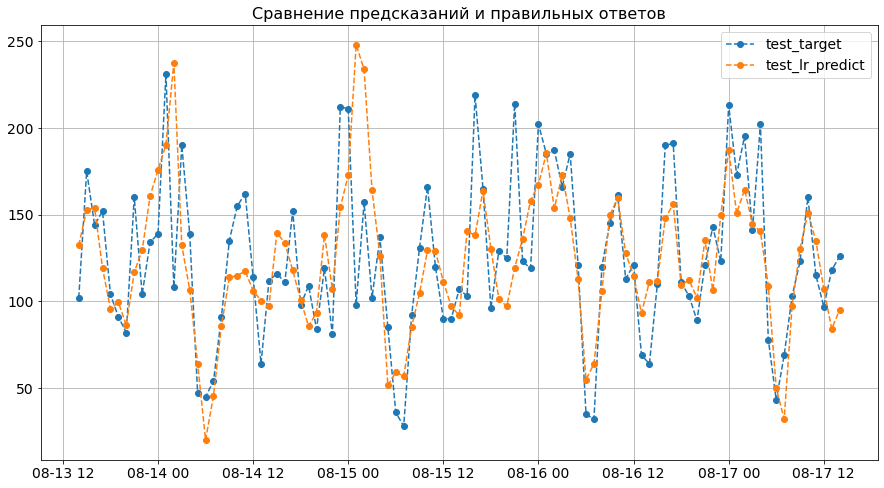

In [62]:
#размер графика
plt.figure(figsize=(15,8))

#строим график
plt.plot(test_target['2018-08-13 14:00:00':'2018-08-17 14:00:00'].index,
             test_target.loc['2018-08-13 14:00:00':'2018-08-17 14:00:00'],
             '--o',
             label='test_target')

plt.plot(test_target['2018-08-13 14:00:00':'2018-08-17 14:00:00'].index,
         test_lr_predict[0:len(test_target['2018-08-13 14:00:00':'2018-08-17 14:00:00'])],
         '--o',
         label='test_lr_predict')

#название графика
plt.title('Сравнение предсказаний и правильных ответов',
          fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#отображение сетки
plt.grid()
plt.legend(fontsize=14)
plt.show()

Очевидно, что результат не такой уж и плохой. Графики довольно близки друг к другу, хоть и нет 100% точности, которая оприори недостижима. Видно, что резкие изменения продаж непросто спрогнозировать. Вероятно, влияли факторы , о которых в доступной нам истории не было сказано. Иначе говоря, в эти дни клиенты вели себя по-другому, чем раньше. 

В таких случаях целесообразно выяснить причины расхождения прогноза и фактических продаж. А такж, если надо, скорректировать модель на найденную причину.

Не забываем убрать лишние столбцы:

In [63]:
data = data[['num_orders']]  

### Вывод

Тестирование моделей линейной регрессии, решающего дерева и случайного леса показало:
- Линейная регрессия требует подбора только ширины окна и размера отставания. При этом худший результат на обучающей выборке ($RMSE=23$) привел к лучшему результату на тестовой ($RMSE=41.8$)
- Модель решающего дерева не удалось привести к заданному диапазону $RMSE$, так как она оказалась наиболее склонной к переобучению из рассматриваемых
- Модель случайного леса позволила существенно снизить ширину окна и размер отставания, при условии грубого шага при варьировании параметров, тем не менее результат соответствует условию задачи $RMSE$ на тестовой выборке $44.3$

## Общий вывод

1. На стадии **подготовки данных** удалось извлечь следующую информацию:
   - Формат даты и времени корректно считался при загрузке данных, учитывается в таблице в качестве индекса (`DatetimeIndex`).
   - В нашем распоряжении данные за период с *01 марта 2018 года* по *31 августа 2018 года*.
   - Мы имеем около **26,5 тысяч** объектов временного ряда при фиксации количества заказов *каждые 10 минут*.
   - В среднем каждые 10 минут происходит около *14 заказов*, медиана - 13.
   - В таблице на данный момент два признака: дата и время, а также количество заказов - целевой признак.
   - Отсутствуют пропущенные значения.
   - По условию задачи нам требуется предсказать количество заказов такси **на следующий час**, по этой причине успешно выполнено *ресемплирование данных по одному часу*.
   - Количество объектов после ресемплирования уменьшилось до примерно **4,4 тыс. штук**.

2. **Обзор исходных данных** позволяет сделать следующий вывод:
   - за период с марта по август *увеличивается количество заказов*, сделанных в среднем за 1 час в течение месяца.
   - наибольшее количество заказов в час в среднем *сделано в августе* - около 130 штук. Это не противоречит здравому смыслу: количество заказов такси в аэропорту наибольшее в пик сезона отпусков (и возврата из отпусков перед школой/учебой).
   - суммарное количество заказов такси в месяц *увеличивается с течением времени* в рамках рассматриваемого периода: от менее 50 тыс. в мае до более 90 тыс. в августе.

3. **Сезонность** при рассмотрении **суточного количества заказов** связана с днём недели:
   - пик суточного количества заказов приходится на понедельник и пятницу,
   - во вторник наблюдается спад количества заказов,
   - со вторника по пятницу количество заказов увеличивается,
   - с пятницы до воскресения снижается,
   - затем неделя снова начинается пиком заказов.

4. С помощью встроенного инструмента нам удалось проследить некоторую сезонность для **почасового количества заказов такси**:
   - пик заказов в аэропорту приходится на ночное время,
   - провал количества заказов такси - в 6 утра,
   - с полуночи до 6 утра спад количества заказов,
   - с 6 утра до 10 утра рост количества заказов, причем допольно интенсивный,
   - с 10 часов утра до примерно 20 ч наблюдается два спада и один пик в 16 ч, но в среднем за это время количество заказов примерно одинаково при визуальном анализе графика,
   - с 20 ч до 24 ч интенсивный рост количества заказов.

5. **Для обучения моделей**, предсказывающих количество заказов такси на следующий час, были выбраны:
   - модель линейной регрессии,
   - модель решающего дерева,
   - модель случайного леса.

6. **Для линейной регрессии** полученный график $RMSE$ на обучающей выборке позволил нам сделать следующие выводы:

   - При значениях размера отставания ниже 21 наблюдается влияние на $RMSE$ ширины окна для скользящего среднего: принекоторых значениях наблюдается явный минимум метрики.
  
   - Чем больше максимальный размер отставания, тем меньшее влияние на $RMSE$ оказывает ширина окна для скользящего среднего. Это объяснимо: увеличиваем размер отставания, увеличиваем количество признаков, поэтому влияние скользящего среднего становится менее заметно для модели.
  
   - Нам необходимо сделать предсказания на следующий час. В этом случае, какой оптимальный максимальный размер отставания может быть? Казалось бы может хватить 24 позиций, так как в сутках 24 часа, но нет. Мы помним, что сезонность была связана и с днями недели, поэтому, по всей видимости, увеличение максимального размера отставания свыше 24 продолжает приводить к уменьшению $RMSE$.
  
    - При значениях `max_lag` свыше 51 уменьшение $RMSE$ уже не так значительно, как на предыдущих шагах.

7. **Для решающего дерева:**

    - Все наши попытки улучшения модели решающего дерева не привели нас к искомому результату: мы не смогли получить $RMSE$ ниже 48 на тестовой выборке.
  
    - $RMSE$  снижается до практически нулевых значений, когда количество деревьев достигает 20. То есть модель "зазубривает" ответы, показывает отличный результат на обучающей выборке, но на тестовой уходит "вразнос". Это демонстрирует переобучение, что для нас крайне нежелательно.

8. **Для случайного леса:**

   - Варьирование ширины окна, максимального размера отставания, глубины решающего дерева и количества деревьев приводит к образованию пятимерного пространства результатов (пятая характеристика - $RMSE$ на обучающей или тестовой выборке). Работа с таким количетсвом гиперпараметров требует больших вычислительных мощностей, поэтому перебор осуществлялся крупным шагом. Тем не менее удалось найти минимальную метрику $RMSE$ на обучающей выборке, которая приводит к удовлетворительному результату, чтобы было установлено при анализе результатов для тестовой выборки. 

9. **Результаты показывают**, что для подобных задач *целесообразно выделять* **валидационную выборку**.


10. **Тестирование моделей** линейной регрессии, решающего дерева и случайного леса показало:

    - Линейная регрессия требует подбора только ширины окна и размера отставания. При этом худший результат на обучающей выборке ($RMSE=23$) привел к лучшему результату на тестовой ($RMSE=43.5$)
    - Модель решающего дерева не удалось привести к заданному диапазону $RMSE$, так как она оказалась наиболее склонной к переобучению из рассматриваемых
    - Модель случайного леса позволила существенно снизить ширину окна и размер отставания, при условии грубого шага при варьировании параметров, тем не менее результат соответствует условию задачи $RMSE$ на тестовой выборке $44.2$